Importing all the necessary modules that are required for the task

In [1]:
#Importing all the neccessary modules required for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical


TASK 1: EXPLORTATORY DATA ANALYSIS

In [2]:
#Loading the data into a data frame and displaying first 5 rows
df=pd.read_csv(r"dataset_aiml_task\data.csv")
print(df.head())
pixels=df.drop('label',axis=1)
labels=df['label']

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

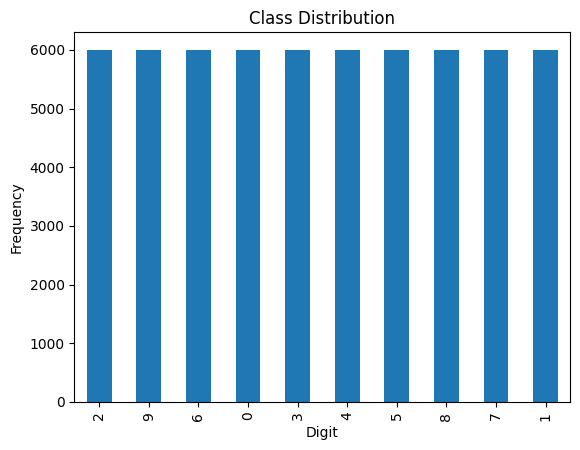

In [3]:
#Class distribution visualization
label_counts=labels.value_counts()
label_counts.plot(kind="bar")
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()
#From the output its clear that that the dataset is balanced


Random image for each digit category


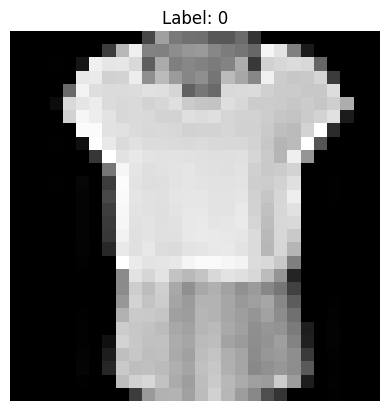

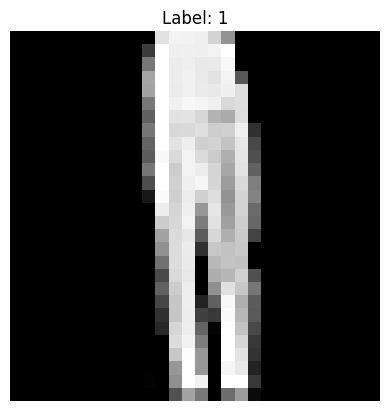

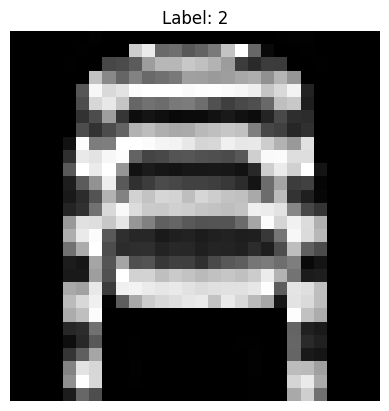

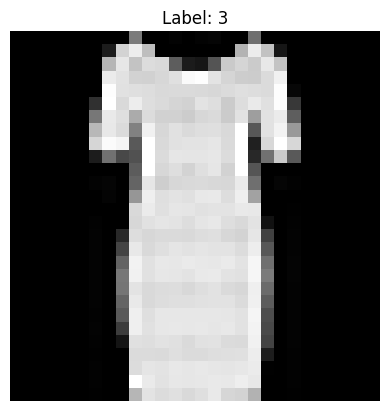

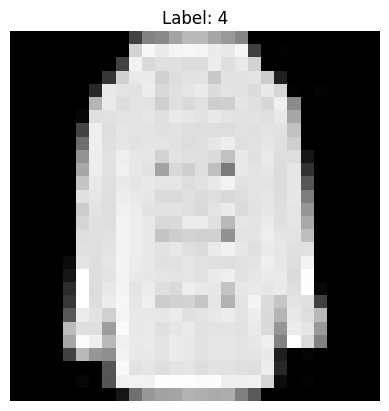

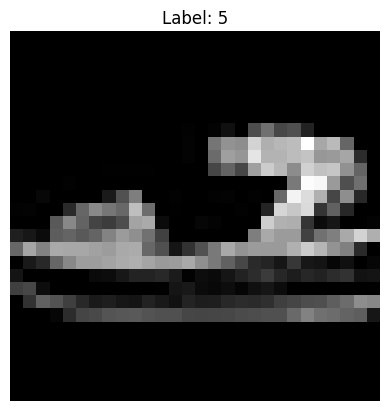

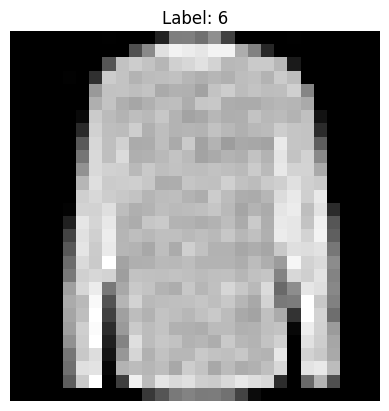

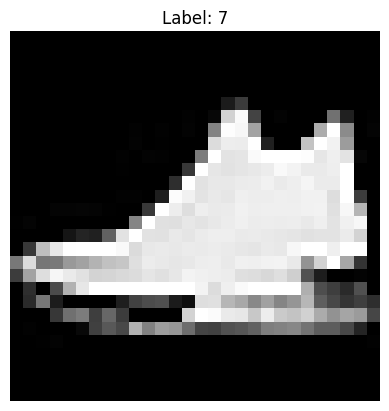

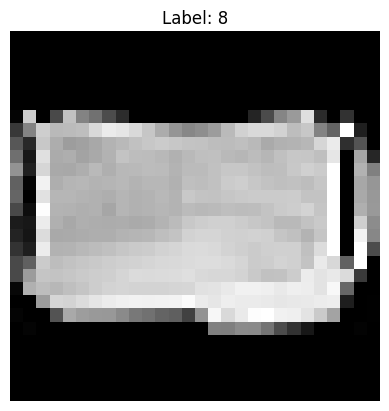

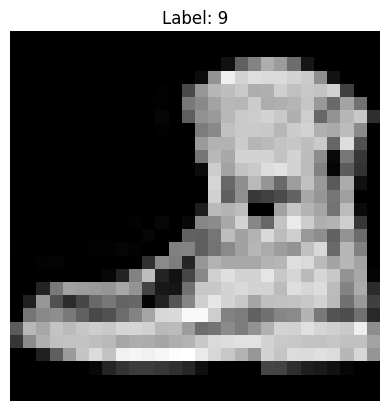

Mean image for each digit category


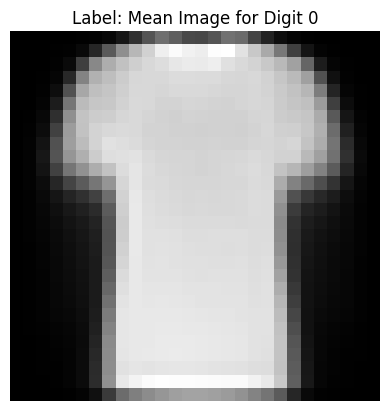

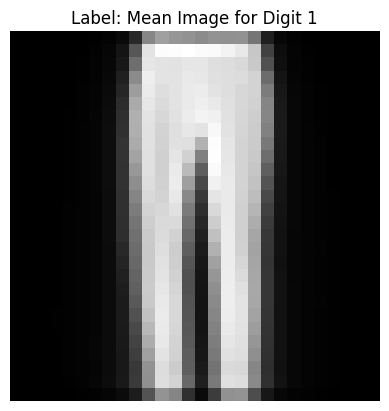

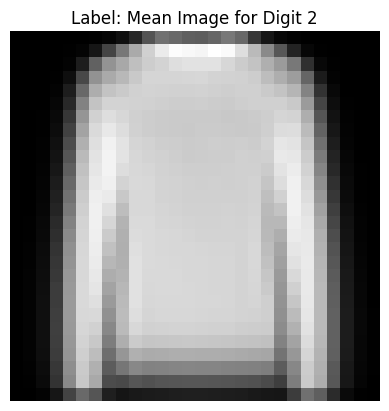

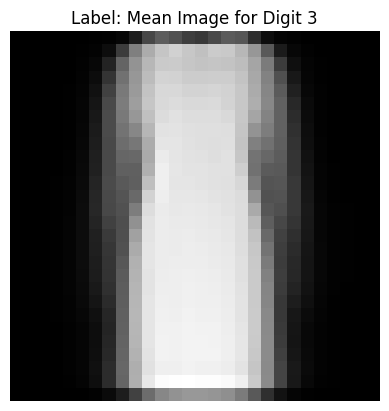

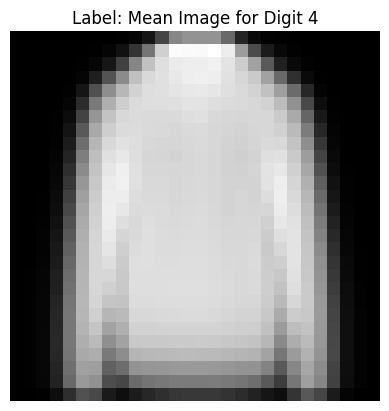

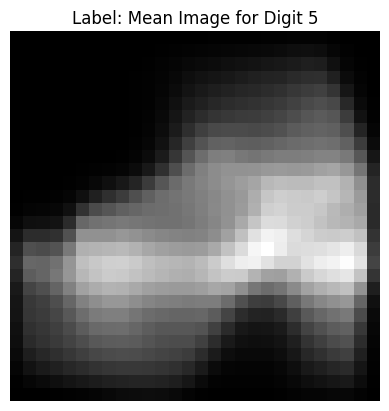

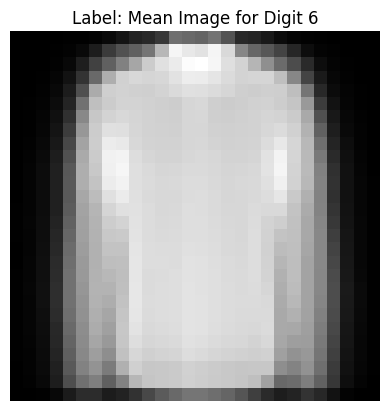

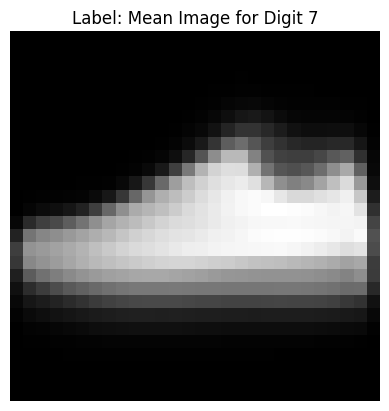

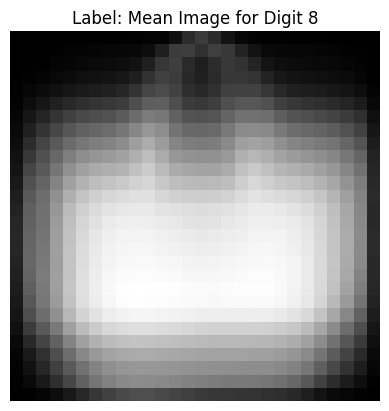

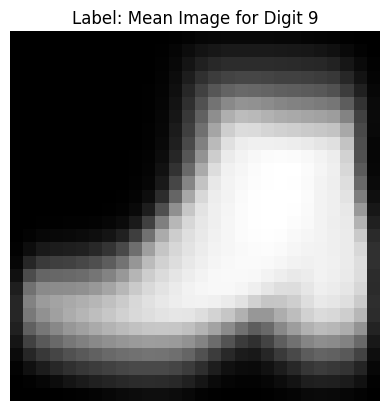

Variance image for each digit category


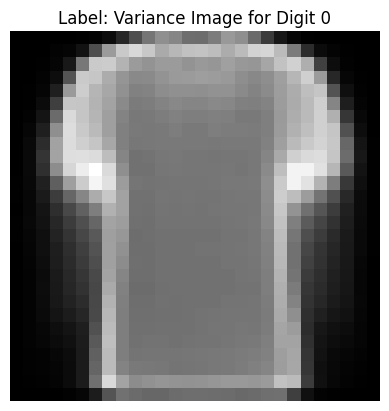

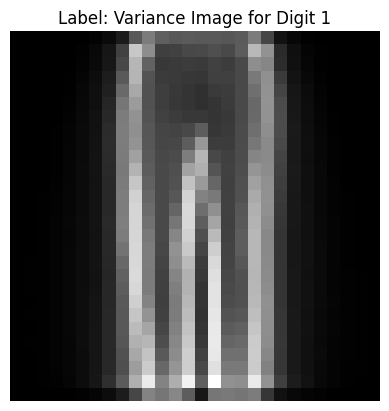

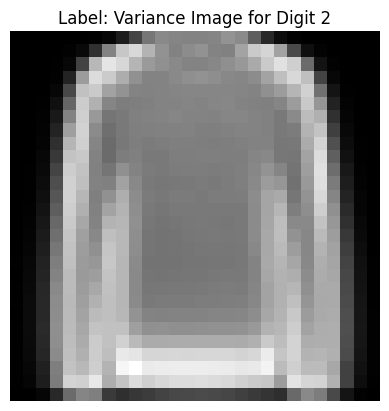

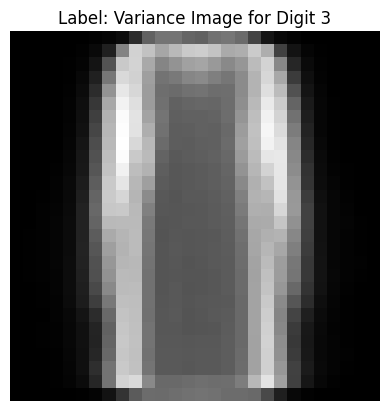

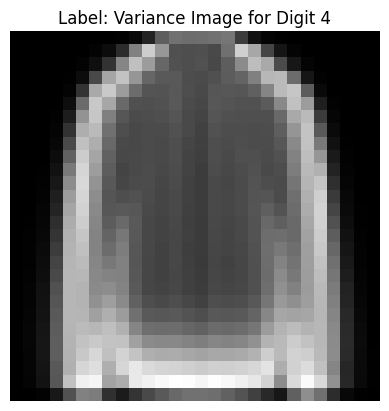

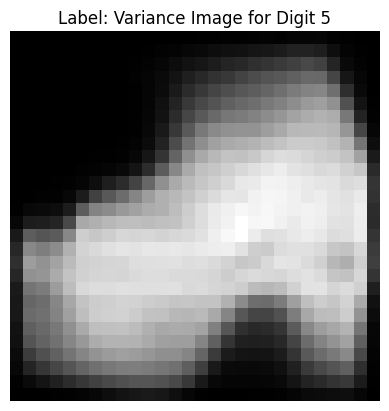

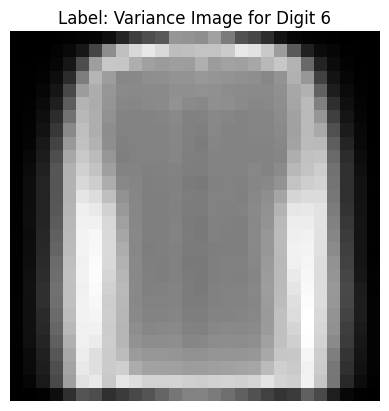

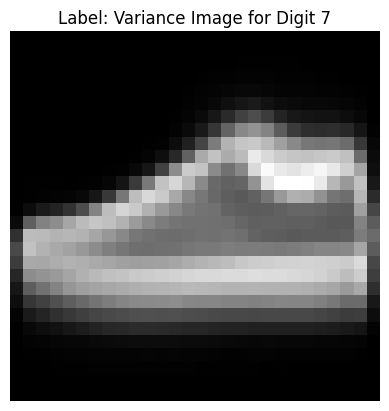

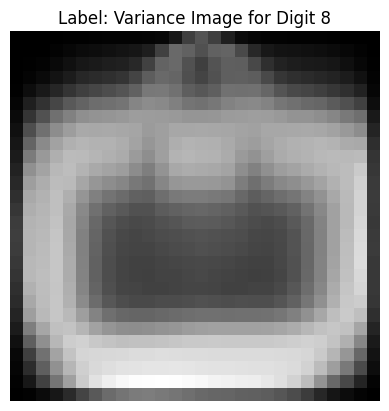

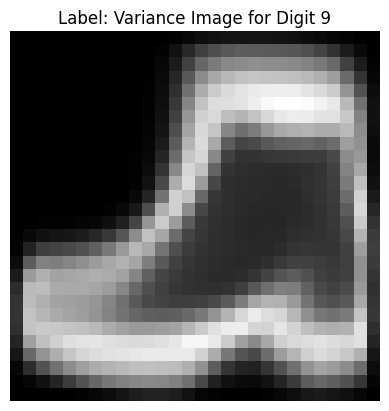

In [4]:
def show_image(image_data,label):
    plt.imshow(image_data.values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print("Random image for each digit category")
#Displaying random sample image of each category
for digit in range(10):
    digit_data = pixels[labels == digit]
    index = np.random.randint(0, digit_data.shape[0])
    show_image(digit_data.iloc[index], digit)

print("Mean image for each digit category")
# Calculate and display the mean image for each digit category
for digit in range(10):
    digit_data = pixels[labels == digit]
    mean_image = digit_data.mean(axis=0)
    show_image(mean_image, f'Mean Image for Digit {digit}')

print("Variance image for each digit category")
# Calculate and display the variance of pixel values for each digit
for digit in range(10):
    digit_data=pixels[labels==digit]
    variance_image = digit_data.var(axis=0)
    show_image(variance_image,f'Variance Image for Digit {digit}')

Now we will generate the summary statistics for pixel values of each category to comprehend data characteristics.

In [ ]:
# Initialize statistics containers
category_stats = {i: {"count": 0, "mean_intensity": 0, "std_intensity": 0} for i in range(10)}
# Compute statistics
for image, label in list(zip(df.iloc[:, 1:].values, df.iloc[:, 0].values)):
    pixels = image
    category_stats[label]["count"] += 1
    category_stats[label]["mean_intensity"] += pixels.mean()
    category_stats[label]["std_intensity"] += pixels.std()

# Normalize mean and std across counts
for label, stats in category_stats.items():
    stats["mean_intensity"] /= stats["count"]
    stats["std_intensity"] /= stats["count"]

# Print summary statistics
for digit, stats in category_stats.items():
    print(f"Digit: {digit}, Count: {stats['count']}, Mean Intensity: {stats['mean_intensity']:.4f}, Std Dev Intensity: {stats['std_intensity']:.4f}")

Digit: 0, Count: 6000, Mean Intensity: 82.8793, Std Dev Intensity: 81.3749
Digit: 1, Count: 6000, Mean Intensity: 56.7484, Std Dev Intensity: 84.9745
Digit: 2, Count: 6000, Mean Intensity: 95.7193, Std Dev Intensity: 82.1061
Digit: 3, Count: 6000, Mean Intensity: 66.2015, Std Dev Intensity: 85.5839
Digit: 4, Count: 6000, Mean Intensity: 98.1557, Std Dev Intensity: 90.3097
Digit: 5, Count: 6000, Mean Intensity: 34.8705, Std Dev Intensity: 63.2457
Digit: 6, Count: 6000, Mean Intensity: 85.1151, Std Dev Intensity: 76.8029
Digit: 7, Count: 6000, Mean Intensity: 42.8357, Std Dev Intensity: 72.8127
Digit: 8, Count: 6000, Mean Intensity: 90.0358, Std Dev Intensity: 87.2685
Digit: 9, Count: 6000, Mean Intensity: 77.0072, Std Dev Intensity: 91.8886


Using K Means Clusterring for visual data statistics

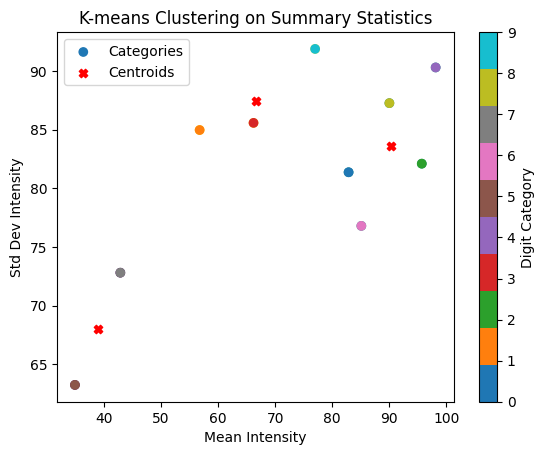

In [34]:
from sklearn.cluster import KMeans
# Replace this with your computed category_stats
data=[]
categories = []
for label in category_stats.keys():
    categories.append(label)
    data.append([category_stats[label]["mean_intensity"],category_stats[label]["std_intensity"]])
data = np.array(data)
categories = np.array(categories)
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data)

# Visualize the clusters (reduce to 2D using PCA if needed)
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
scatter = plt.scatter(data[:, 0], data[:, 1], c=categories, cmap='tab10', marker='o', label='Categories')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', label='Centroids')
plt.colorbar(scatter, label='Digit Category')
plt.xlabel('Mean Intensity')
plt.ylabel('Std Dev Intensity')
plt.title('K-means Clustering on Summary Statistics')
plt.legend()
plt.show()

TASK 2:Basic Classification Model

In [33]:
# Assuming the first column is the label and the rest are pixel values
X = df.iloc[:, 1:].values  # Features (pixel values)
y = df.iloc[:, 0].values   # Labels (digits)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to the range [0, 1]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
check=y_test
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 48000
Test set size: 12000


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Create the logistic regression model with multi_class='multinomial'
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
# Train the model on the training data
model.fit(x_train, y_train.argmax(axis=1))  # Use argmax to convert one-hot encoded labels back to integers

# Make predictions on the test data
y_pred = model.predict(x_test)
for i in range(10):
    print(y_pred[i],check[i])
# Evaluate the model
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test.argmax(axis=1), y_pred))



c:\Users\Meatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


7 7
8 8
8 8
5 5
9 9
1 1
2 2
3 6
6 6
4 2
Accuracy: 84.26%
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1232
           1       0.95      0.96      0.96      1174
           2       0.76      0.75      0.75      1200
           3       0.84      0.86      0.85      1242
           4       0.73      0.76      0.75      1185
           5       0.92      0.93      0.92      1141
           6       0.65      0.57      0.61      1243
           7       0.92      0.93      0.92      1224
           8       0.94      0.93      0.93      1149
           9       0.94      0.94      0.94      1210

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



TASK 3:Neural Network Implementation

c:\Users\Meatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7788 - loss: 0.6370
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8624 - loss: 0.3857
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8767 - loss: 0.3391
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8830 - loss: 0.3178
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8915 - loss: 0.2955
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8972 - loss: 0.2796
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9014 - loss: 0.2673
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9023 - loss: 0.2619
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9072 - loss: 0.2489
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9094 - loss: 0.2399
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9140 - loss: 0.2271

Test accuracy: 0.9137666821479797
187

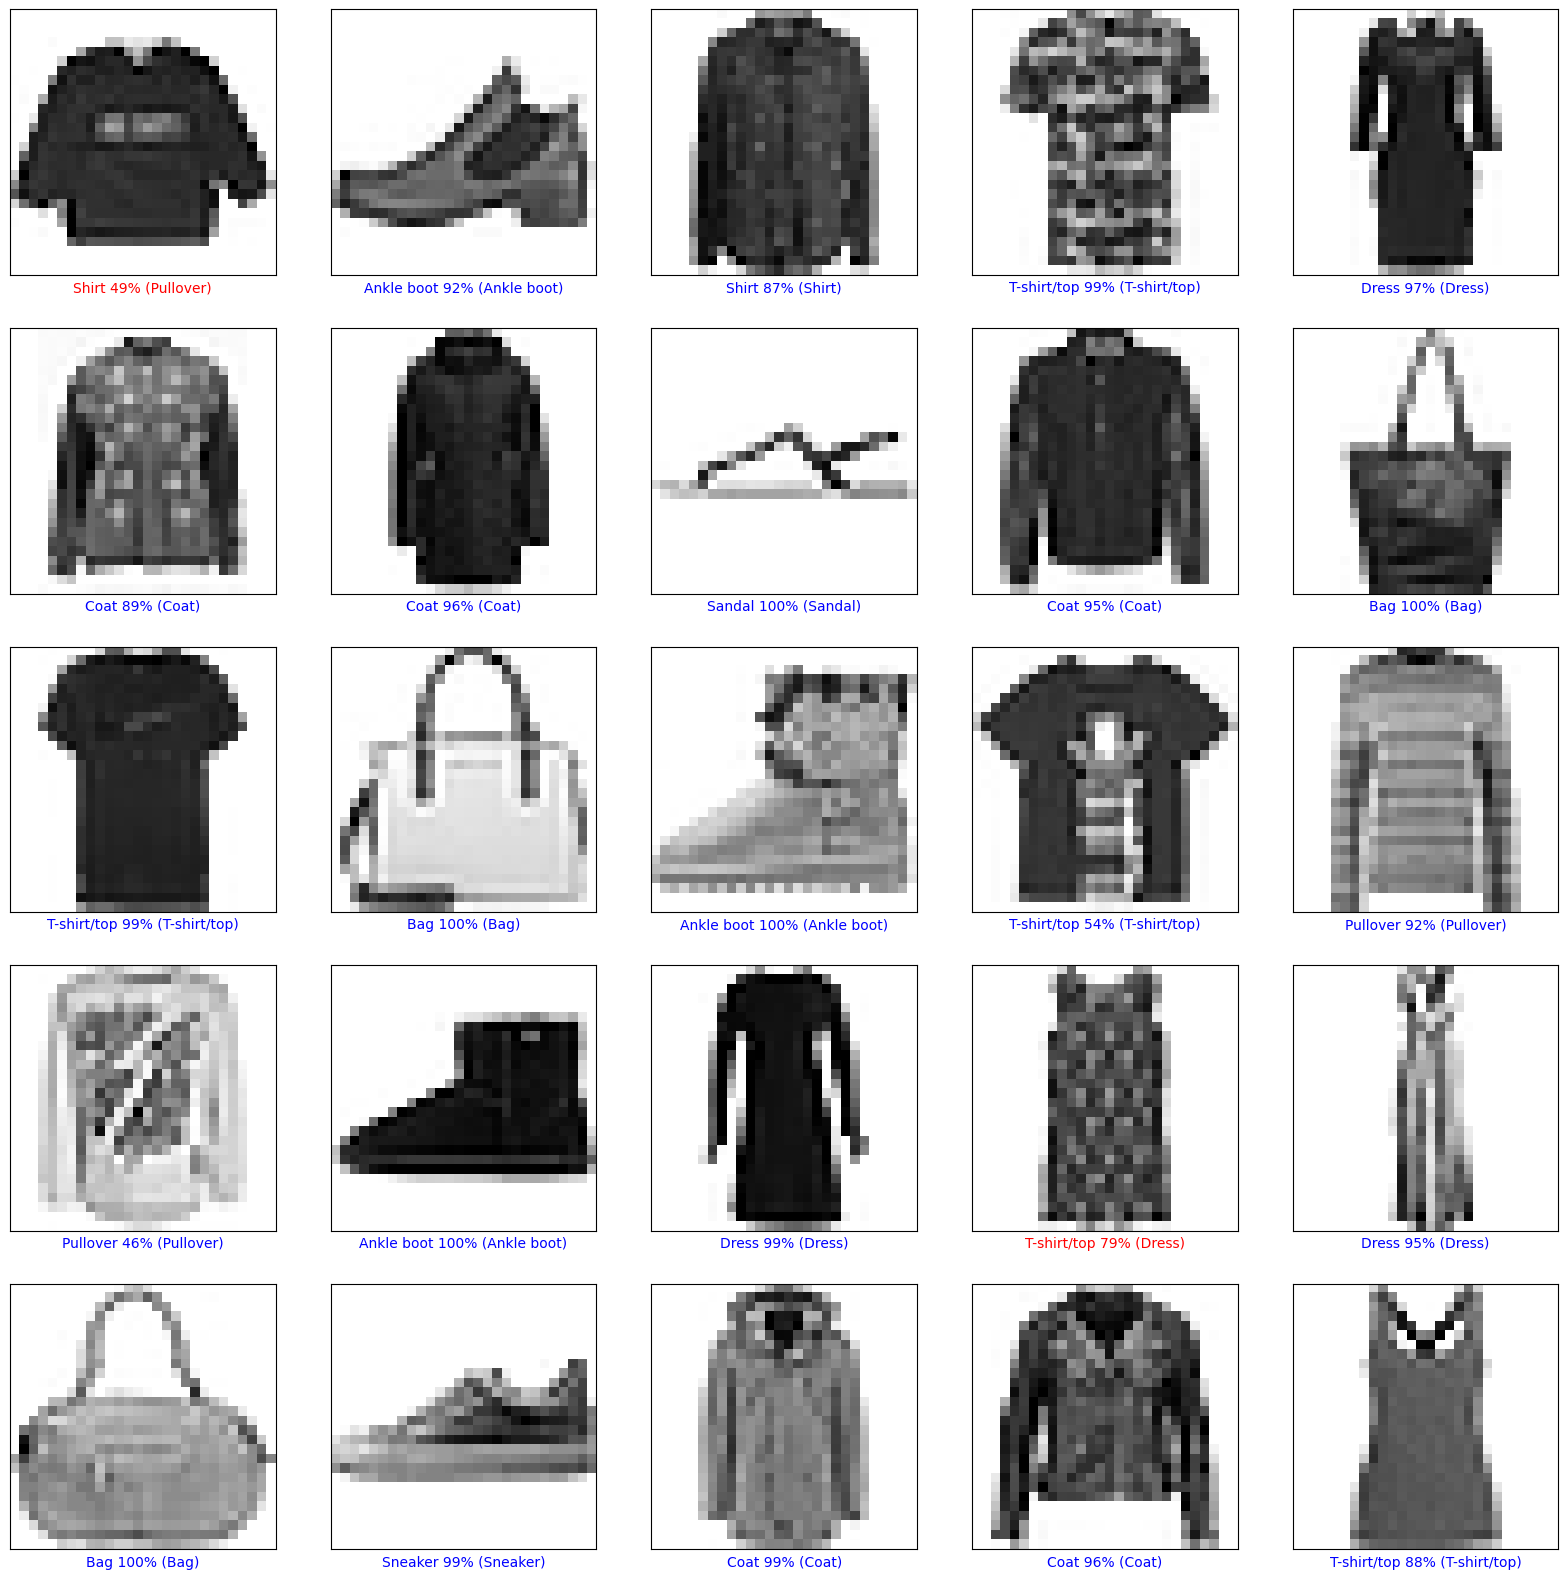

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_df = df
test_df = df

# Separate labels and features
train_labels = train_df.iloc[:, 0].values
train_images = train_df.iloc[:, 1:].values
test_labels = test_df.iloc[:, 0].values
test_images = test_df.iloc[:, 1:].values

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images
train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)

# Function to plot the image and prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.show()


